# Measuring efficiency

## Import

In [4]:
import pandas as pd

In [2]:
L2_TARGET = 0.01160101
CLSCOEF_TARGET = 0.267977
T2_TARGET = 0.02666667
C2_TARGET = 0

## Reading our dataset

In [1]:
FILENAME = "NGEN=10000-C2-L2-CLSCOEF-T2"

In [5]:
df = pd.read_csv(FILENAME + ".csv")
df = df.drop("Unnamed: 0", axis=1)

In [6]:
df.head

<bound method NDFrame.head of            x         y  label
0  -0.931199  0.235682      0
1   0.726935  0.189900      1
2  -0.176786  0.948708      0
3   0.212381 -0.627450      1
4   0.983363 -0.541686      1
..       ...       ...    ...
95  1.375568 -0.290548      1
96 -0.379215 -0.435785      0
97  0.591404 -0.751003      1
98  1.130365  0.312761      1
99 -0.629958 -0.661613      0

[100 rows x 3 columns]>

## Measuring Complexity

### Setting up `ECOL`

In [9]:
# import rpy2's package module
import rpy2.robjects.packages as rpackages

# import R's utility package
utils = rpackages.importr('utils')

# select a mirror for R packages
utils.chooseCRANmirror(ind=1)  # select the first mirror in the list

# Install the ECoL package
utils.install_packages("ECoL")

# Import Ecol
ecol = rpackages.importr('ECoL')


R[write to console]: Installing package into ‘/home/steffanop/R/x86_64-pc-linux-gnu-library/4.0’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cloud.r-project.org/src/contrib/ECoL_0.3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 22430 bytes (21 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

### Measuring our complexity

In [7]:
from rpy2.robjects import pandas2ri
from rpy2.robjects import Formula

pandas2ri.activate()

# Convert to r_df
r_df = pandas2ri.py2rpy(df)
fml = Formula('label ~ .')

#### L2 - T2

In [8]:
l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

t2Vector = ecol.dimensionality_formula(
    fml, df, measures="T2", summary="return")
t2 = t2Vector[0]

data = {'Target': [L2_TARGET,T2_TARGET], 'Result': [l2,t2]}

#### L2 - CLSCOEF

In [9]:
l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

clscoefVector = ecol.network_formula(
    fml, df, measures="ClsCoef", summary="return")
clscoef = clscoefVector.rx(1)
clscoef = clscoef[0][0]

data = {'Target': [L2_TARGET, CLSCOEF_TARGET,], 'Result': [l2, clscoef]}


#### CLSCOEF - T2

In [10]:
clscoefVector = ecol.network_formula(
    fml, df, measures="ClsCoef", summary="return")
clscoef = clscoefVector.rx(1)
clscoef = clscoef[0][0]

t2Vector = ecol.dimensionality_formula(
    fml, df, measures="T2", summary="return")
t2 = t2Vector[0]

data = {'Target': [CLSCOEF_TARGET,T2_TARGET], 'Result': [clscoef, t2]}

#### L2 - clscoef - T2

In [11]:
l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

clscoefVector = ecol.network_formula(fml, df, measures="ClsCoef", summary="return")
clscoef = clscoefVector.rx(1)
clscoef = clscoef[0][0]

t2Vector = ecol.dimensionality_formula(
    fml, df, measures="T2", summary="return")
t2 = t2Vector[0]

data = {'Target':[L2_TARGET,CLSCOEF_TARGET,T2_TARGET],'Result':[l2,clscoef,t2]}

#### 

#### C2 - L2 - T2

In [12]:
c2Vector = ecol.balance_formula(fml, df, measures="C2", summary="return")
c2 = c2Vector.rx(1)
c2 = c2[0][0]

l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

t2Vector = ecol.dimensionality_formula(
    fml, df, measures="T2", summary="return")
t2 = t2Vector[0]

data = {'Target': [C2_TARGET, L2_TARGET,
                   T2_TARGET], 'Result': [c2, l2, t2]}

#### C2 - L2 - CLSCOEF - T2

In [10]:
c2Vector = ecol.balance_formula(fml, df, measures="C2", summary="return")
c2 = c2Vector.rx(1)
c2 = c2[0][0]

l2Vector = ecol.linearity_formula(fml, df, measures="L2", summary="return")
l2 = l2Vector.rx(1)
l2 = l2[0][0]

clscoefVector = ecol.network_formula(fml, df, measures="ClsCoef", summary="return")
clscoef = clscoefVector.rx(1)
clscoef = clscoef[0][0]

t2Vector = ecol.dimensionality_formula(
    fml, df, measures="T2", summary="return")
t2 = t2Vector[0]

data = {'Target': [C2_TARGET, L2_TARGET, CLSCOEF_TARGET, T2_TARGET], 'Result': [c2, l2, clscoef, t2]}


## Taking a look at the efficiency

In [14]:
df_plot = pd.DataFrame(data, index=['L2','T2'])

ValueError: Shape of passed values is (4, 2), indices imply (2, 2)

In [ ]:
df_plot = pd.DataFrame(data, index=['L2','CLSCOEF'])

In [ ]:
df_plot = pd.DataFrame(data, index=['CLSCOEF','T2'])

In [ ]:
df_plot = pd.DataFrame(data, index=['L2','CLSCOEF','T2'])

In [ ]:
df_plot = pd.DataFrame(data, index=['C2', 'L2', 'T2'])

In [11]:
df_plot = pd.DataFrame(data, index=['C2', 'L2', 'CLSCOEF', 'T2'])


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

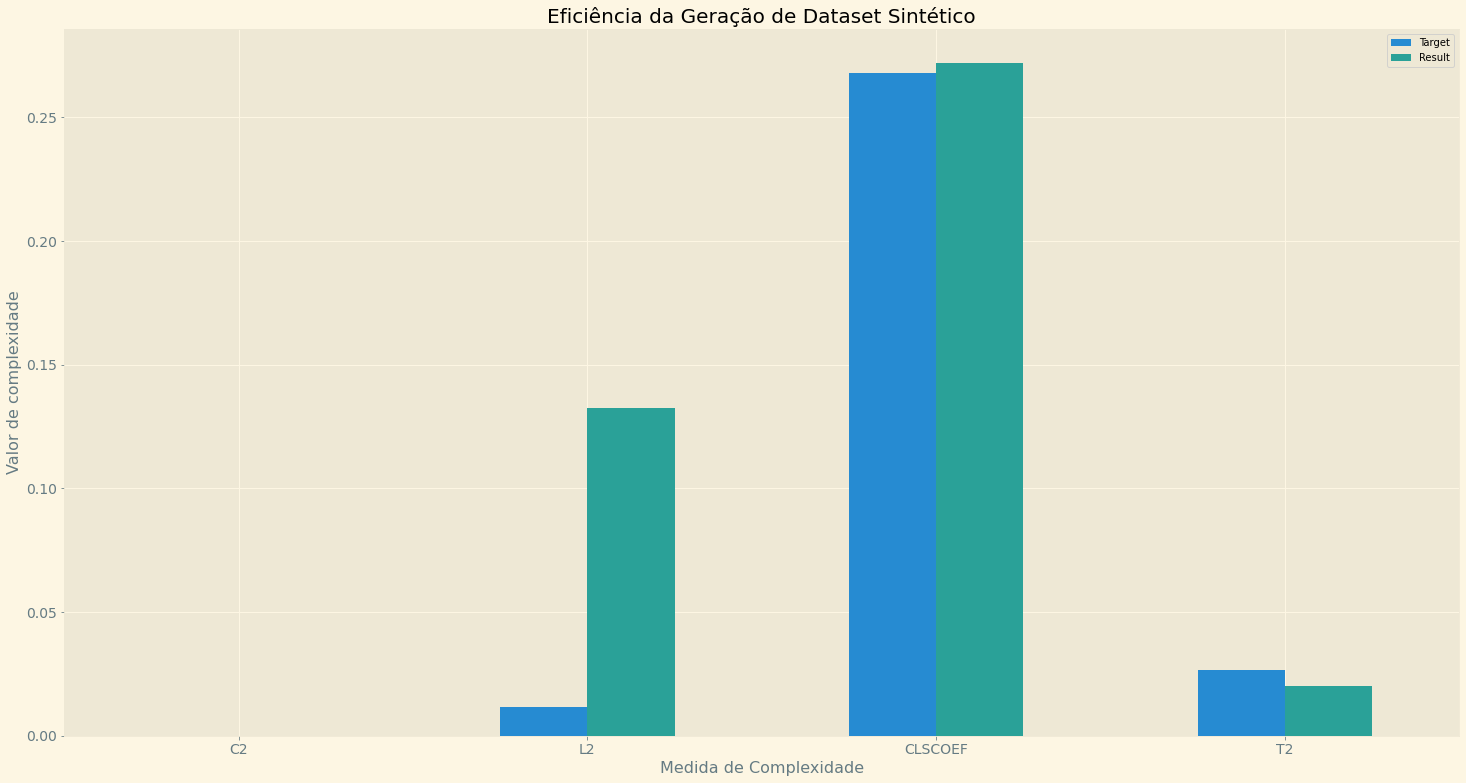

In [12]:
from matplotlib import pyplot as plt
import matplotlib

matplotlib.style.use('Solarize_Light2')
df_plot.plot.bar(figsize=(25, 13), rot=0)
plt.title("Eficiência da Geração de Dataset Sintético", fontsize=20)
plt.xlabel("Medida de Complexidade", fontsize=16)
plt.ylabel("Valor de complexidade", fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)